In [2]:
import sys
sys.path.append("..")

from utils.model import Net_mask
import torch

import matplotlib.pyplot as plt

In [4]:
#model_file = "../saved_models/models_infinite_data/ML/model_weights.pth"
#model_file = "../saved_models/models_finite_data/e5/prior_100/model_weights.pth"
#model_file = "../saved_models/infinite_test/model_weights.pth"
model_file = "../saved_models/testing/rml/long/e4/0/model_weights.pth"
model = Net_mask()
model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

In [5]:
test_obses = torch.load('../data/test_observations/all_test_observations.pt')
test_solution = torch.load('../data/test_observations/all_test_solutions.pt')

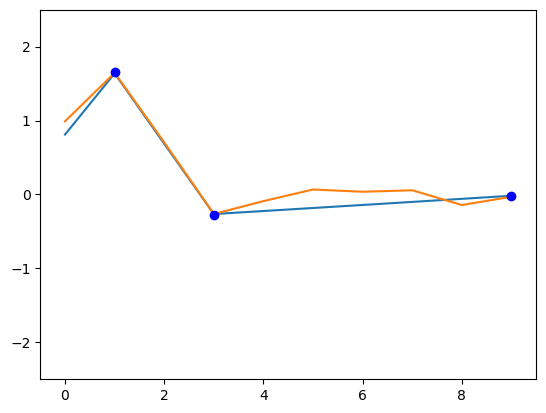

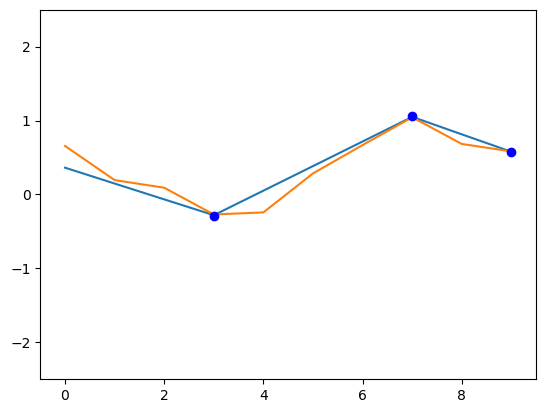

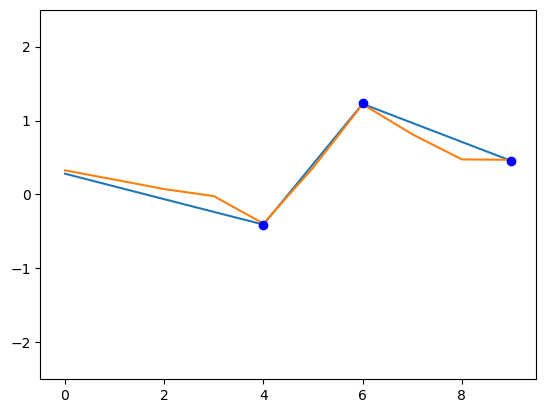

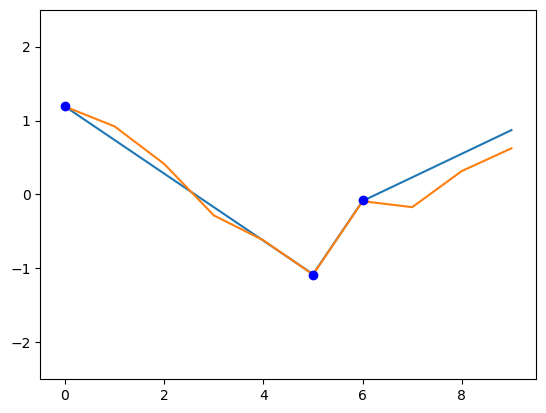

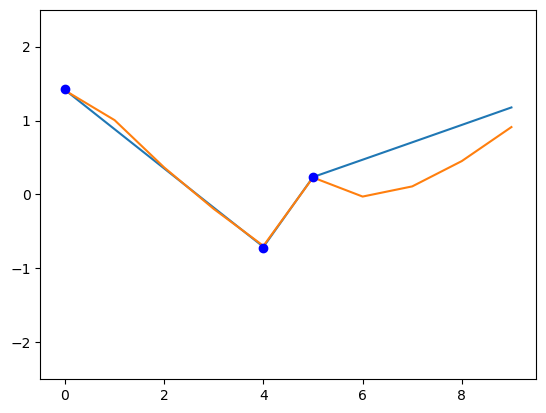

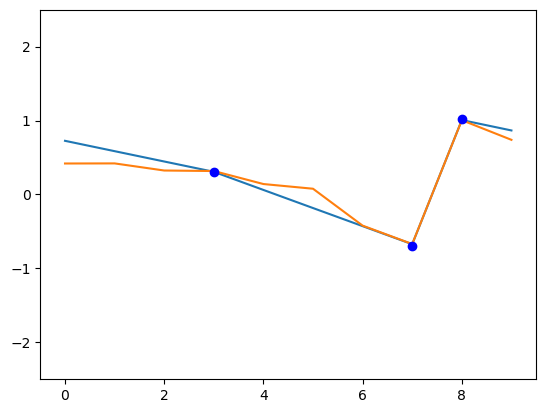

In [6]:
num_points = 3
for j in range(6):
    ind = int(f'{num_points}{j}')
    y = test_obses[ind,:10]
    mask = test_obses[ind,10:]
    mask_bool = mask > 0.5
    points = torch.where(mask_bool)[0]
    values = y[mask_bool]

    test_obs = test_obses[ind]
    out = model(test_obs)

    plt.figure()
    plt.plot(range(10), test_solution[ind])
    plt.plot(range(10), out.detach().numpy())
    plt.plot(points, values, 'bo')
    plt.axis([-0.5, 9.5, -2.5, 2.5])